In [1]:
import pytest
import numpy as np
import dedalus.public as de
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(0, os.path.abspath('../'))
from GQLProjection import Project

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [3]:
Lx = 1
xb = de.Fourier('x', 128, interval=(0,Lx))
yb = de.Fourier('y', 128) # interval is (0, 2pi)
zb = de.Chebyshev('z', 16)
d = de.Domain([xb, yb, zb], grid_dtype=np.float64)
f = d.new_field()
xx,yy,zz = d.grids()

nx_l = 2
ny_l = 2
nx_h = 8
ny_h = 8

In [4]:
a = d.all_elements()

In [5]:
a[0][:11,0,0]

array([ 0.        ,  6.28318531, 12.56637061, 18.84955592, 25.13274123,
       31.41592654, 37.69911184, 43.98229715, 50.26548246, 56.54866776,
       62.83185307])

In [6]:
low_mask = (a[0] <= 50.26548245743669)

(0.0, 11.0)

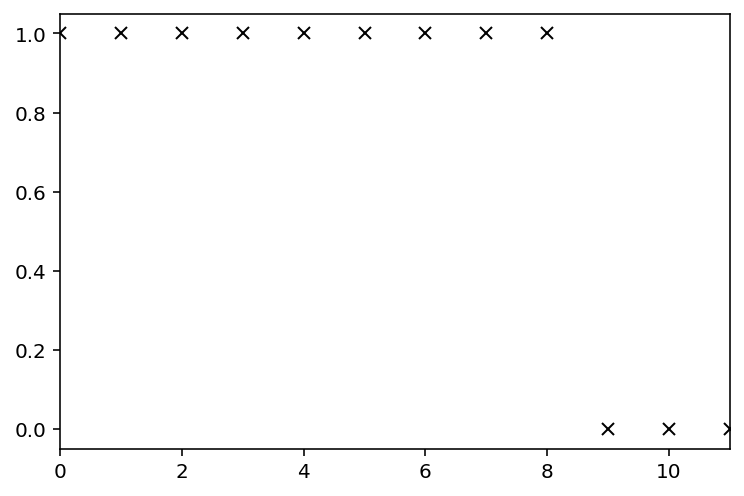

In [7]:
plt.plot(low_mask[:,0,0],'kx')
plt.xlim(0,11)

In [8]:
f['g'] = ( np.sin(nx_l*2*np.pi/Lx*xx))*(np.sin(ny_h*yy)) + ( np.sin(nx_h*2*np.pi/Lx*xx))*(np.sin(ny_l*yy)) 
f['g'] /= f['g'].max() #normalize

l = Project(f,[8,4],'low')
h = Project(f, [8,4],'high')
low = l.evaluate()
hi = h.evaluate()

Text(0.5, 1.0, 'hi')

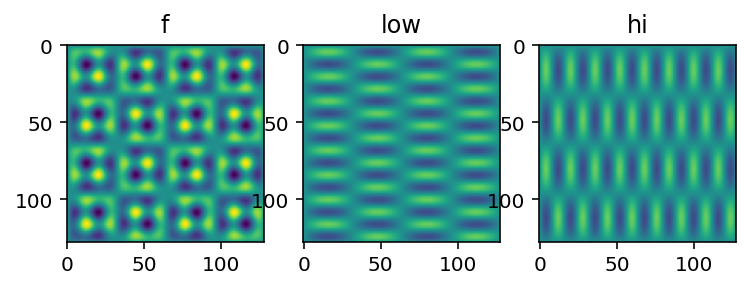

In [9]:
fig, axs = plt.subplots(1, 3)

im = axs[0].imshow(f['g'][:,:,0],vmin=-1,vmax=1)
axs[0].set_title("f")
im = axs[1].imshow(low['g'][:,:,0],vmin=-1,vmax=1)
axs[1].set_title("low")
im = axs[2].imshow(hi['g'][:,:,0],vmin=-1,vmax=1)
axs[2].set_title("hi")


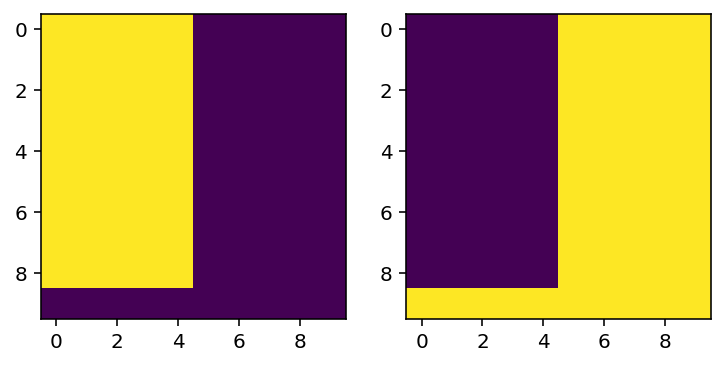

In [10]:
plt.subplot(121)
plt.imshow(l.mask[:10,:10,0])
plt.subplot(122)
plt.imshow(h.mask[:10,:10,0])

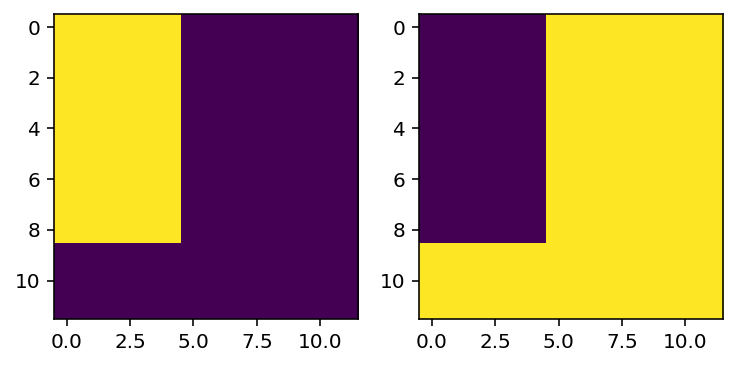

In [11]:
plt.subplot(121)
plt.imshow(l.mask[:12,:12,0])
plt.subplot(122)
plt.imshow(h.mask[:12,:12,0])